In [1]:
from circuit_tree import *
import copy

from qiskit.primitives import Estimator
from qiskit.quantum_info import Pauli

In [2]:
n1 = OpTreeSum([OpTreeCircuit("circuit1"),OpTreeCircuit("circuit2")],[-1,1])
n2 = OpTreeSum([OpTreeCircuit("circuit3"),OpTreeCircuit("circuit4")],[-2,2])

test = OpTreeList([n1,n2])



print(str(test))


[1.0*[-1*
circuit1
 + 1*
circuit2], 1.0*[-2*
circuit3
 + 2*
circuit4]]


In [3]:
build_total_str(test)

'[[circuit1 + circuit2] , [circuit3 + circuit4]]'

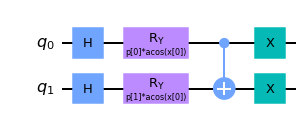

In [4]:
x = ParameterVector("x",1)
p = ParameterVector("p",2)

QC = QuantumCircuit(2)

QC.h([0,1])

QC.ry(p[0]*np.arccos(x[0]),0)
QC.ry(p[1]*np.arccos(x[0]),1)

QC.cx(0,1)
QC.x([0,1])

QC.draw()

In [5]:
test = circuit_derivative(circuit_derivative_v2(circuit_derivative_v2(QC,p[0]),p[0]),p[0])
print(test)

[0.5*acos(x[0])*
[0.5*acos(x[0])*
[0.5*acos(x[0])*
     ┌───┐┌────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + 3π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬───┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├────┤ X ├┤ X ├
     └───┘   └─────────────────────┘    └───┘└───┘
 + -0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├───┤ X ├┤ X ├
     └───┘   └─────────────────────┘   └───┘└───┘]
 + -0.5*acos(x[0])*
[0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├───┤ X ├┤ X ├
     └───┘   └─────────────────────┘   └───┘└───┘
 + -0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) - π/2) ├──■──┤ X ├
     ├───┤└──┬──

In [6]:
test._children_list[0]._children_list[0]

In [7]:
test2 = test
print(test2)

[0.5*acos(x[0])*
[0.5*acos(x[0])*
[0.5*acos(x[0])*
     ┌───┐┌────────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + 3π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬───┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├────┤ X ├┤ X ├
     └───┘   └─────────────────────┘    └───┘└───┘
 + -0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├───┤ X ├┤ X ├
     └───┘   └─────────────────────┘   └───┘└───┘]
 + -0.5*acos(x[0])*
[0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) + π/2) ├──■──┤ X ├
     ├───┤└──┬─────────────────────┬──┘┌─┴─┐├───┤
q_1: ┤ H ├───┤ Ry(p[1]*acos(x[0])) ├───┤ X ├┤ X ├
     └───┘   └─────────────────────┘   └───┘└───┘
 + -0.5*acos(x[0])*
     ┌───┐┌───────────────────────────┐     ┌───┐
q_0: ┤ H ├┤ Ry(p[0]*acos(x[0]) - π/2) ├──■──┤ X ├
     ├───┤└──┬──

In [8]:
circ = test2._children_list[0]._children_list[0]._children_list[0]
circ.parameters

ParameterView([ParameterVectorElement(p[0]), ParameterVectorElement(p[1]), ParameterVectorElement(x[0])])

In [9]:
dic={}
dic[p[0]] = 0.5
dic[p[1]] = 1.0
dic[x[0]] = 0.25

In [10]:
np.array([ dic[p] for p in circ.parameters ])

array([0.5 , 1.  , 0.25])

In [11]:
evaluate(test2,Estimator(),Pauli("ZZ"),dic)

build_lists_and_index_tree 0.0009987354278564453
len(circuit_list) 8
run 0.01099848747253418


-9.64467382818777e-17